In [1]:
%matplotlib inline
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import datetime as dt
#sys._enablelegacywindowsfsencoding()
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None)

In [44]:
path = "./data/train.csv"
df = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [45]:
len(df.provincia.unique())
df.provincia.unique()

array(['Distrito Federal', 'Jalisco', 'Edo. de México', 'Oaxaca',
       'Quintana Roo', 'Colima', 'San luis Potosí', 'Nuevo León',
       'Querétaro', 'Tamaulipas', 'Puebla', 'Yucatán', 'Morelos',
       'Guerrero', 'Tabasco', 'Guanajuato', 'Hidalgo', 'Veracruz',
       'Chihuahua', 'Aguascalientes', 'Sonora', 'Michoacán',
       'Baja California Norte', 'Baja California Sur', 'Coahuila',
       'Durango', 'Sinaloa', 'Chiapas', 'Nayarit', 'Tlaxcala', 'Campeche',
       'Zacatecas', nan], dtype=object)

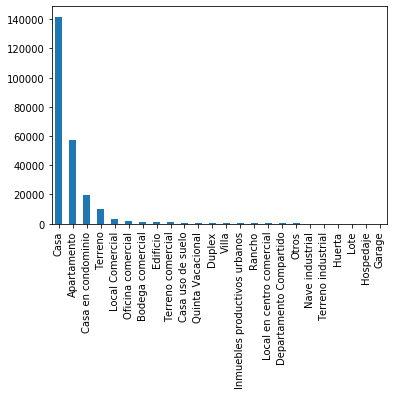

In [46]:
df.tipodepropiedad.value_counts().plot(kind = 'bar')

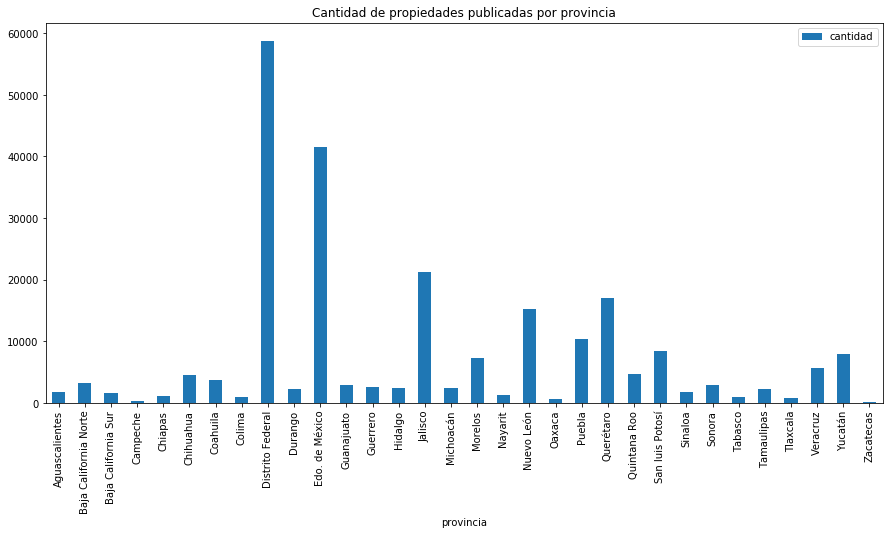

In [47]:
df["cantidad"] = 1
principales = df.groupby(["provincia"]).agg({"cantidad":sum}).plot(kind = "bar", figsize=(15,7), title='Cantidad de propiedades publicadas por provincia')

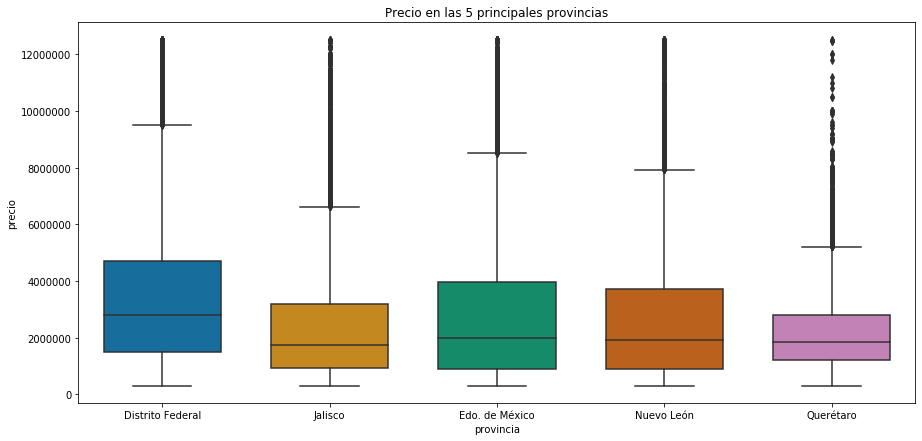

In [48]:
lista = df.groupby(["provincia"]).agg({"cantidad":sum}).sort_values("cantidad",ascending = False).head(5)
lista = lista.index.to_list()
principalesDF = df[df["provincia"].isin(lista)].copy()
principalesDF = principalesDF[['provincia','precio']]
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
bplot = sns.boxplot(y='precio', x='provincia', data=principalesDF, width=0.7, palette="colorblind").set_title("Precio en las 5 principales provincias")

In [49]:
df.loc[df['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
df.loc[df['tipodepropiedad'] == 'Departamento Compartido', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Apartamento', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Local Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Bodega comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Terreno comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Oficina Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Local en centro comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Nave industrial', 'tipodepropiedad'] = 'Terreno industrial'

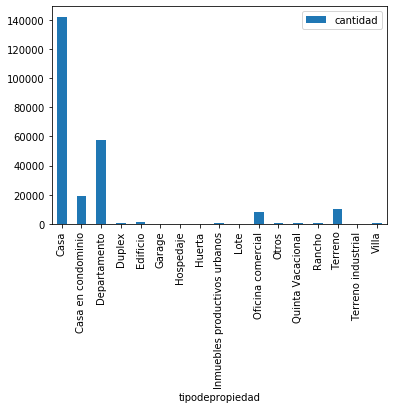

In [50]:
df.groupby('tipodepropiedad').agg({'cantidad':sum}).plot(kind='bar')

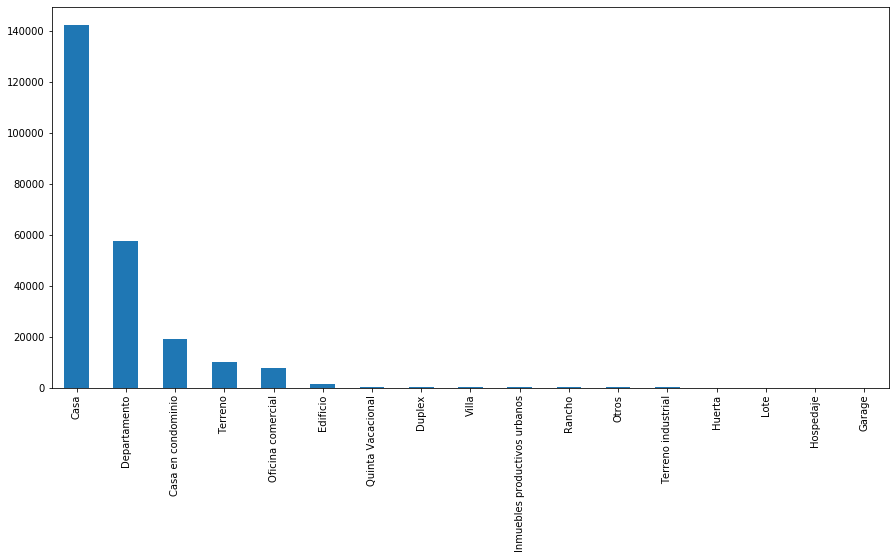

In [51]:
plt.figure(figsize=(15, 7))
df.tipodepropiedad.value_counts().plot(kind = 'bar')

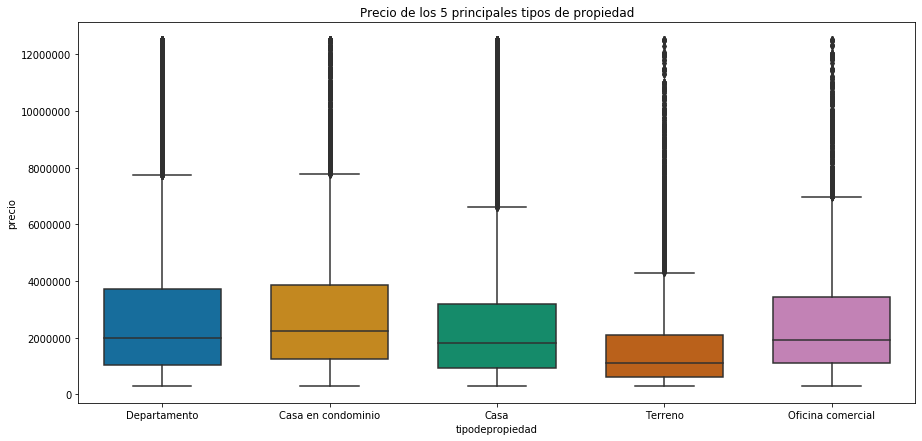

In [52]:
listaPrincipales = df.groupby("tipodepropiedad").agg({"cantidad":sum}).sort_values("cantidad", ascending=False).head(5).index.to_list()
principalesProp = df[df.tipodepropiedad.isin(listaPrincipales)] .copy()
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
bplot2 = sns.boxplot(y='precio', x='tipodepropiedad', data=principalesProp, width=0.7, palette="colorblind").set_title("Precio de los 5 principales tipos de propiedad")

In [53]:
principalesProp["swapear"] = principalesProp["metrostotales"] < principalesProp["metroscubiertos"]
aux = principalesProp.loc[principalesProp["swapear"], "metrostotales"]
if (not aux.empty):
    principalesProp.loc[principalesProp["swapear"],"metrostotales"] = \
    principalesProp.loc[principalesProp["swapear"], "metroscubiertos"]
    principalesProp.loc[principalesProp["swapear"], "metroscubiertos"] = aux
principalesProp.drop(columns="swapear", inplace=True)
(principalesProp["metrostotales"] < principalesProp["metroscubiertos"]).value_counts()

False    236842
dtype: int64

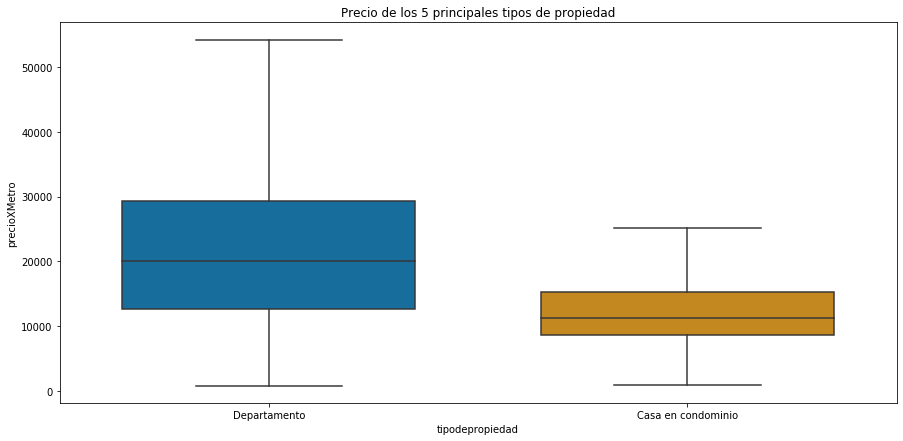

In [54]:
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
deptoYCasaEnCondominio = principalesProp.loc[(principalesProp['tipodepropiedad'] == 'Departamento') | (principalesProp['tipodepropiedad'] == 'Casa en condominio')]
deptoYCasaEnCondominio['precioXMetro'] = deptoYCasaEnCondominio['precio']/deptoYCasaEnCondominio['metrostotales']
bplot2 = sns.boxplot(y='precioXMetro', x='tipodepropiedad', data=deptoYCasaEnCondominio, width=0.7, palette="colorblind", showfliers=False).set_title("Precio de los 5 principales tipos de propiedad")

In [55]:
DF = df.groupby(['fecha']).agg({'precio':'mean', 'cantidad':sum}).reset_index().copy()

Text(0.5, 1.0, 'Valor promedio de las propiedades en funcion del tiempo')

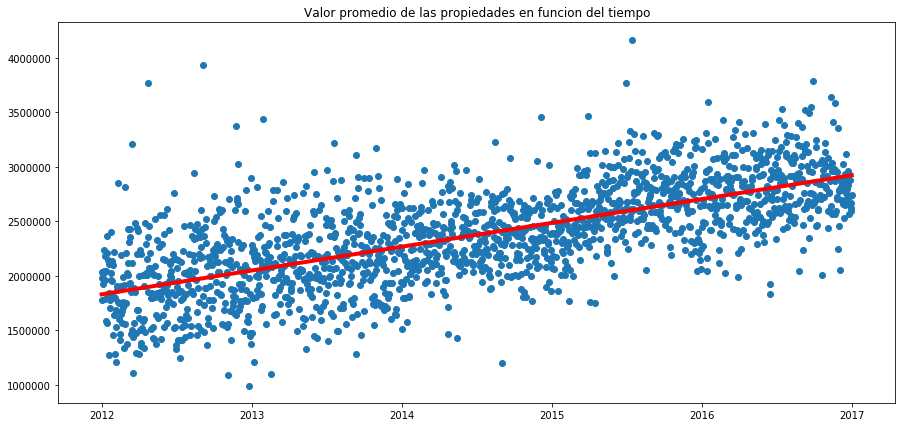

In [60]:
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
DF['fechaOrd']=DF['fecha'].map(dt.datetime.toordinal)
fig = plt.scatter(x=DF.fecha, y=DF.precio)
x = DF['fechaOrd']
y = DF['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);
plt.title('Valor promedio de las propiedades en funcion del tiempo')

Text(0.5, 1.0, 'Precio por año')

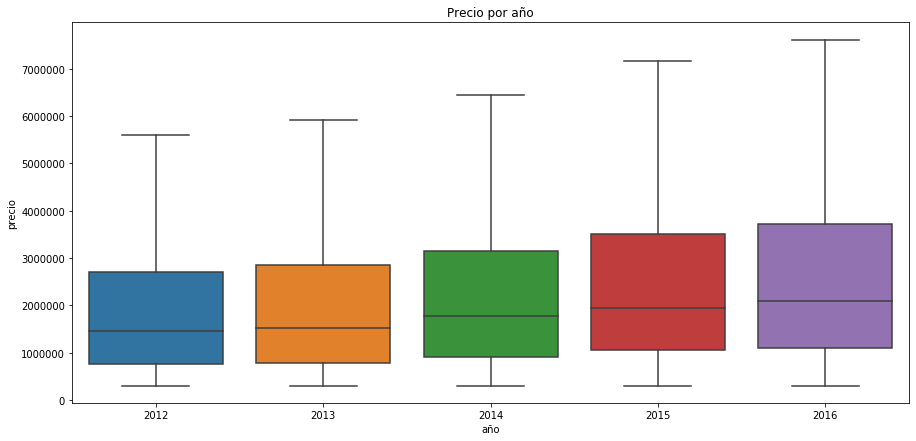

In [61]:
df['año'] = df.fecha.dt.year
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='año', y='precio', data=df, showfliers = False).set_title("Precio por año")

Text(0.5, 1.0, 'Precio metro cuadrado por años')

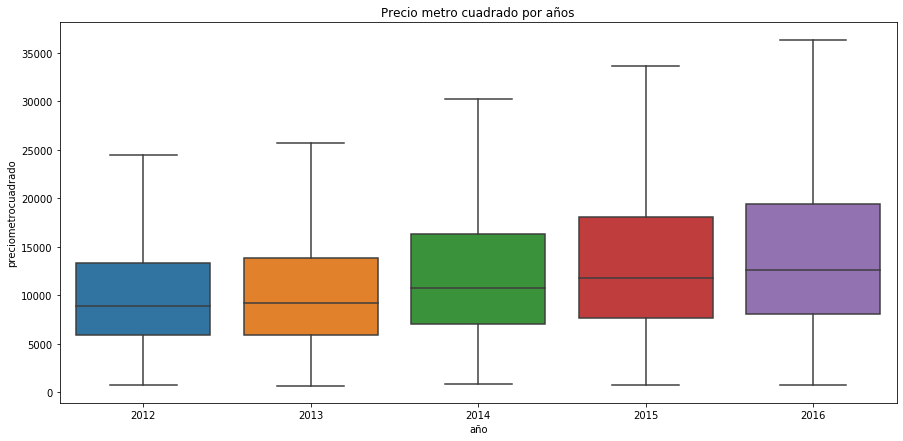

In [62]:
df['preciometrocuadrado'] = df['precio']/df['metrostotales']
df['año'] = df.fecha.dt.year
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='año', y='preciometrocuadrado', data=df, showfliers = False).set_title("Precio metro cuadrado por años")

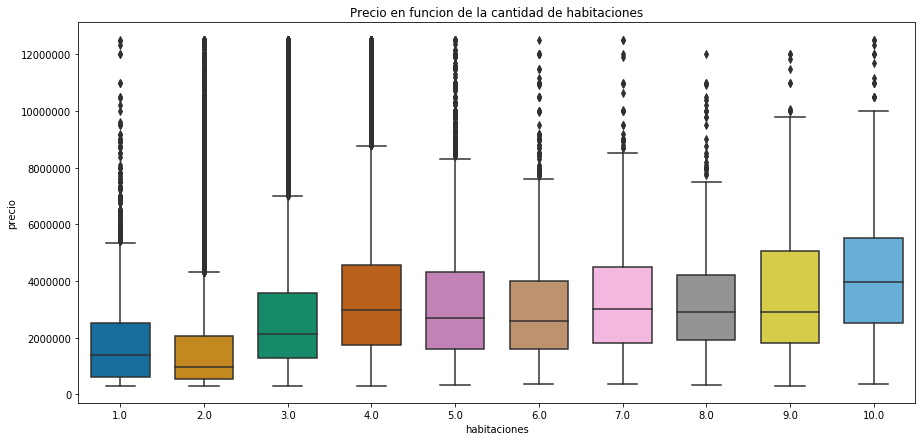

In [63]:
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
bplot3 = sns.boxplot(y='precio', x='habitaciones', data=df, width=0.7, palette='colorblind').set_title('Precio en funcion de la cantidad de habitaciones')

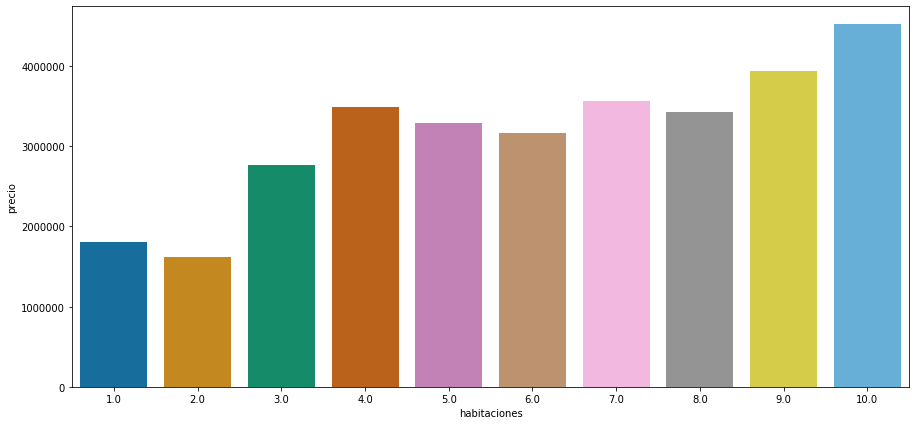

In [64]:
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
DF = df.groupby('habitaciones').agg({'precio':'mean'}).reset_index().copy()
sns.barplot(x='habitaciones', y='precio', data=DF, palette='colorblind')

In [65]:
df["swapear"] = df["metrostotales"] < df["metroscubiertos"]
aux = df.loc[df["swapear"], "metrostotales"]
if (not aux.empty):
    df.loc[df["swapear"],"metrostotales"] = \
    df.loc[df["swapear"], "metroscubiertos"]
    df.loc[df["swapear"], "metroscubiertos"] = aux
df.drop(columns="swapear", inplace=True)
(df["metrostotales"] < df["metroscubiertos"]).value_counts()
df['preciometrocuadrado'] = df.precio/df.metrostotales

Text(0.5, 1.0, 'Precio dependiendo de si tiene usos multiples o no')

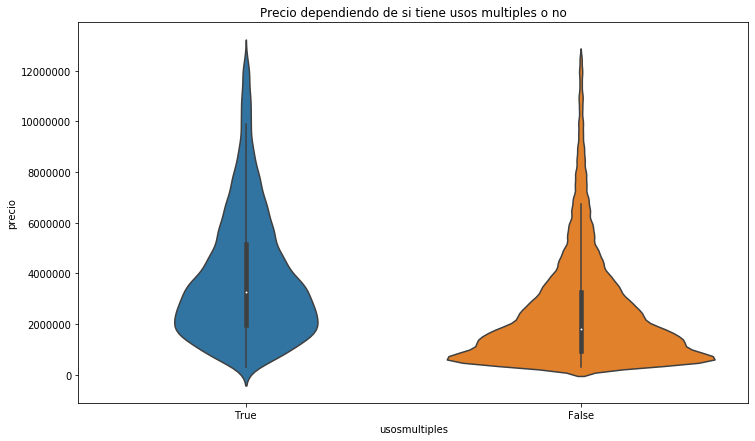

In [71]:
beneficios = df[['gimnasio','usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'precio']]
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='usosmultiples', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene usos multiples o no")

Text(0.5, 1.0, 'Precio dependiendo de si tiene gimnasio o no')

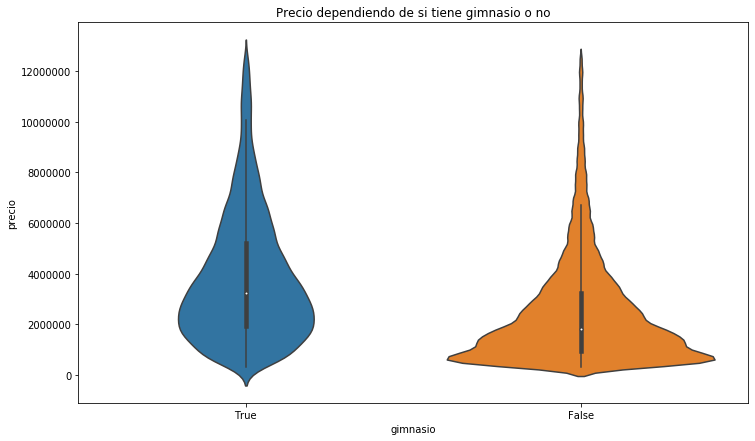

In [72]:
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='gimnasio', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene gimnasio o no")

Text(0.5, 1.0, 'Precio dependiendo de si tiene piscina o no')

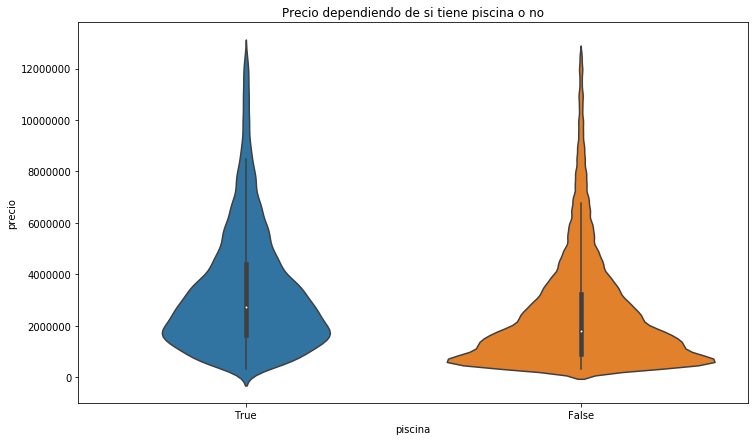

In [73]:
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='piscina', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene piscina o no")

Text(0.5, 1.0, 'Precio dependiendo de si tiene centros comerciales cercanos o no')

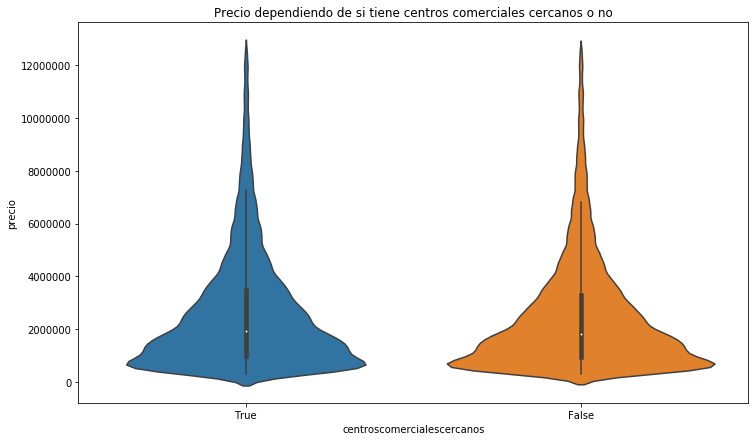

In [74]:
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='centroscomercialescercanos', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene centros comerciales cercanos o no")

Text(0.5, 1.0, 'Precio dependiendo de si tiene escuelas cercanas o no')

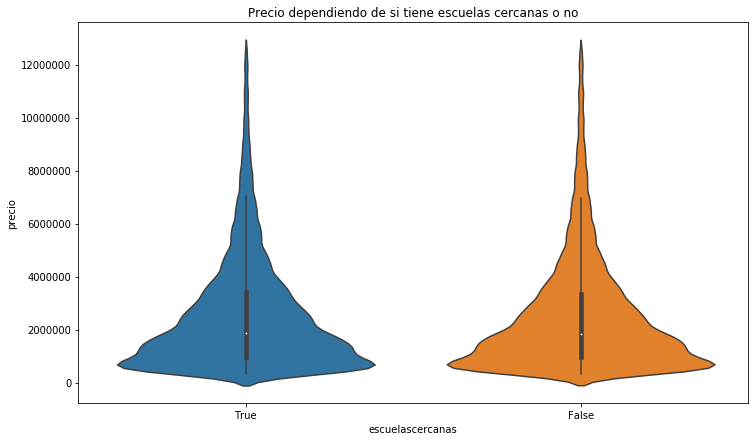

In [75]:
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='escuelascercanas', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene escuelas cercanas o no")